In [2]:
!pip3 install pandas matplotlib pillow

Kích thước file ảnh: 69820 bytes (~68.18 KB)


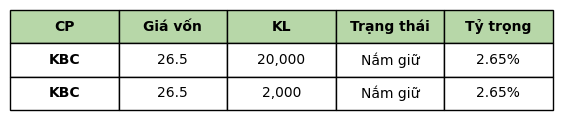

In [11]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import matplotlib.patches as patches
import io


# Dữ liệu dạng dict
data = [
    {
        "stockCode": "KBC",
        "price": 26.5,
        "volume": 20000,
        "status": "Nắm giữ",
        "percent": "2.65%"
    },
    {
        "stockCode": "KBC",
        "price": 26.5,
        "volume": 2000,
        "status": "Nắm giữ",
        "percent": "2.65%"
    }
]

headers = ['CP', 'Giá vốn', 'KL', 'Trạng thái', 'Tỷ trọng']
rows = [[d['stockCode'], f"{d['price']:,}", f"{d['volume']:,}", d['status'], d['percent']] for d in data]

# 📐 Vẽ hình
fig, ax = plt.subplots(figsize=(7, 0.5 + 0.4 * len(rows)))
ax.set_axis_off()

# 📋 Tạo bảng
table = Table(ax, bbox=[0, 0, 1, 1])
n_rows = len(rows)
n_cols = len(headers)
width, height = 1.0 / n_cols, 1.0 / (n_rows + 1)

# 🎨 Màu header
header_bg_color = '#b7d7a8'  # xanh lá nhạt
highlight_bg = {
    1: '#f4e598',  # Vàng nhạt cho "Giá vốn"
    4: '#ffc000',  # Cam đậm cho "Tỷ trọng"
}

# Header
for col_idx, header in enumerate(headers):
    bg = header_bg_color
    cell = table.add_cell(0, col_idx, width, height, text=header, loc='center', facecolor=bg)
    cell.set_fontsize(10)
    cell.set_text_props(weight='bold')

# Data rows
for row_idx, row in enumerate(rows, start=1):
    for col_idx, cell_val in enumerate(row):
        cell = table.add_cell(row_idx, col_idx, width, height, text=str(cell_val), loc='center', facecolor='white')
        if col_idx == 0:
            cell.set_text_props(weight='bold')  # CP in đậm

# Viền đen
for row in range(n_rows + 1):
    for col in range(n_cols):
        cell = table[(row, col)]
        cell.set_edgecolor('black')
        cell.set_linewidth(1)

ax.add_table(table)


# ===== 📦 Export thành buffer =====
buf = io.BytesIO()
plt.savefig(buf, format='png', dpi=500, bbox_inches='tight')
buf.seek(0)  # rất quan trọng!

file_size_bytes = len(buf.getvalue())
file_size_kb = file_size_bytes / 1024
print(f"Kích thước file ảnh: {file_size_bytes} bytes (~{file_size_kb:.2f} KB)")

plt.show()
